In [1]:
#import require libraries:

# *** Should we import these inside functions mixed eview on practices as it is dire to program but if functiond pulled out ad implemented in other code will require this 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import json
import codecs
import ast
from io import StringIO

from os import path
#import word and regex functions for checking 
from disallowTermCheck import checkTerms
from disallowRegexCheck import checkRegex
# from unit_testing_nonallowedwords import checkword

In [2]:
#parameters for disallowed list and url 
notebookList ='This parameter will be passed through papermill'
disallowedTermsList = 'This parameter will be passed through papermill'

In [3]:
# Parameters
notebookList = "./sampleNotebooks/sample1.ipynb\n./sampleNotebooks/sample2.ipynb\n./sampleNotebooks/sample3.ipynb"
disallowedTermsList = "\n0,security,100,security des\n1,class,200,class des\n2,people,300,people des\n3,adhesion,400,adhesion des\n"


In [4]:
def readNotebook(notebookToReadPath):
    try:
                file = codecs.open(notebookToReadPath, "r")
                source = file.read()
                y = json.loads(source)
                currentNotebook = []
                for x in y['cells']:
                    for x2 in x['source']:
                        currentNotebook.append(x2)
                
                return currentNotebook
    except:
        print("Can't read file")
        return False

In [5]:
#notebook checker function 
def notebookChecker(disallowedTermsList, notebookList):
    directory = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    csvStringIO = StringIO(disallowedTermsList)
    sortedList = np.array(pd.read_csv(csvStringIO, sep=",", header=None))
    termIndexKey = {} 
    termWeightKey = {}
    disallowedList = []
    overallTermCount = {}
    for item in sortedList:
        termIndexKey.update({item[1]:item[0]})
        termWeightKey.update({item[1]:item[2]})
        disallowedList.append(item[1])
        
        
    # print(f"index {termIndexKey} \n weight {termWeightKey}")
    # dictionary of word:rule_num and dictionary of word:weight
    regexFile = "regexFile/regexPatterns.csv"
    regexList = pd.read_csv(path.join(directory, regexFile))
    sortedregexList = pd.DataFrame(regexList, columns=['index','pattern','weight'])
    sortedregexList = np.array(sortedregexList)
    patternIndexKey = {}
    patternWeightKey ={}
    
    disallowedregexList = []
    #here we take the regex patterns and ad them to the list to be checked by regex function
    for item in sortedregexList:
        patternIndexKey.update({item[1]:item[0]})
        patternWeightKey.update({item[1]:item[2]})
        disallowedregexList.append(item[1])
    # print(disallowedregexList)
    overallPatternCount = {pattern : 0 for pattern in disallowedregexList}

    checkedNotebooks = {}
    sortedNotebookList = StringIO(notebookList)
    print(sortedNotebookList)
    uncheckedNotebooks = np.array(pd.read_csv(sortedNotebookList, sep=",", header=None))
    print(uncheckedNotebooks)
    # print (f"\n Here we open and read the notebooks due to be open {uncheckedNotebooks} \n")
    

    #loop through files from list

    for uncheckedNotebook in uncheckedNotebooks:
        
        overallScore = 0
        notebook = {}
        # here we check line by line the the terms found which are added to a list 
        notebookToRead = str(f"{path.join(directory, uncheckedNotebook[0])}")
        contents = readNotebook(notebookToRead)
        
        lineNum = 1
        for item in sortedList:
            overallTermCount[item[1]] = 0
        
        overallTermCountByLine = {}
        overallPatternCountByLine = {}
        
        for contentLine in contents:
            # print(f"\n content line {contentLine} \n")
            termResults = checkTerms(contentLine, disallowedList)
            if termResults != False:
                # print(termResults)
                overallTermCountByLine[lineNum] = termResults
                for term in overallTermCount:
                    if termResults[term] > 0 :
                        overallTermCount[term] += termResults[term]
                        overallScore += termResults[term]
            else:
                overallTermCountByLine[lineNum] = 'none found'
            
            regExOutput = checkRegex(disallowedregexList, contentLine)
            overallPatternCountByLine[lineNum] = regExOutput
            for patternsFound in regExOutput:
                overallPatternCount[patternsFound] += regExOutput[patternsFound]
                overallScore += regExOutput[patternsFound]
            lineNum += 1
        print(uncheckedNotebook)
        print(overallTermCount)
        # print(overallPatternCount)
        # print(overallTermCountByLine)
        # # print(overallPatternCountByLine)
        print(overallScore)
        checkedNotebooks.update({str(uncheckedNotebook): {'overallScore': overallScore,'overallTermCount' : str(overallTermCount),'overallTermCountByLine' : str(overallTermCountByLine), 'overallPatternCount' : str(overallPatternCount),'overallPatternCountByLine' : str(overallPatternCountByLine)}})
  
        
    return checkedNotebooks 
        

notebookResults = notebookChecker(disallowedTermsList, notebookList)
# print(notebookResults)

[['./sampleNotebooks/sample1.ipynb']
 ['./sampleNotebooks/sample2.ipynb']
 ['./sampleNotebooks/sample3.ipynb']]
['./sampleNotebooks/sample1.ipynb']
{'security': 16, 'class': 9, 'people': 6, 'adhesion': 0}
44
['./sampleNotebooks/sample2.ipynb']
{'security': 8, 'class': 6, 'people': 4, 'adhesion': 0}
31
['./sampleNotebooks/sample3.ipynb']
{'security': 0, 'class': 3, 'people': 0, 'adhesion': 0}
189


# Here we check results

In [6]:
totals = {}
# print(notebookResults.keys())
for result in notebookResults:  
    totals[result] = notebookResults[result].get('overallScore')
    # return back to dictionary for graphs
# print(totals)


# short description

                                     Total Score
['./sampleNotebooks/sample2.ipynb']           31
['./sampleNotebooks/sample1.ipynb']           44
['./sampleNotebooks/sample3.ipynb']          189
Regex patterns Found by notebook
                                       ['./sampleNotebooks/sample1.ipynb']
[a-zA-Z0-9]+@[a-zA-Z]+\.(com|edu|net)                                    0
^(http|https)                                                            2
[0-9]                                                                   11
                                       ['./sampleNotebooks/sample2.ipynb']
[a-zA-Z0-9]+@[a-zA-Z]+\.(com|edu|net)                                    0
^(http|https)                                                            4
[0-9]                                                                   22
                                       ['./sampleNotebooks/sample3.ipynb']
[a-zA-Z0-9]+@[a-zA-Z]+\.(com|edu|net)                                    0
^(http|https)        

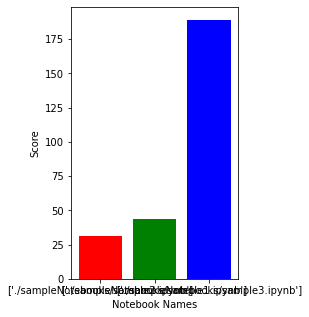

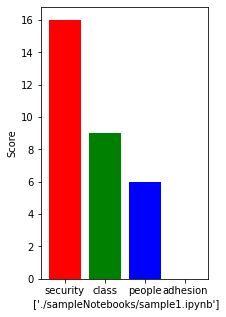

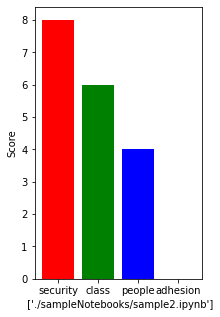

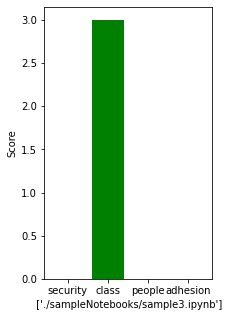

In [7]:
orderedResults = { nb:score for nb,score in sorted(totals.items(), key=lambda item:item[1])}
df = pd.DataFrame.from_dict(orderedResults, orient='index', columns=[('Total Score')])
print(df)
#PLot examples
f = plt.figure()
f.set_figwidth(3)
f.set_figheight(5)
plt.bar(range(len(orderedResults)),list(orderedResults.values()),align='center',color=['r','g','b'])
plt.xticks(range(len(orderedResults)),list(orderedResults.keys()))
plt.xlabel('Notebook Names')
plt.ylabel('Score')
plt.show

print('Regex patterns Found by notebook')
for result in notebookResults:
    terms = ast.literal_eval(notebookResults[result]['overallPatternCount'])
    terms = pd.DataFrame.from_dict(terms, orient='index', columns=[(result)])
    print(terms)

print('Terms Found by notebook')
for result in notebookResults:
    terms = ast.literal_eval(notebookResults[result]['overallTermCount'])
    g = plt.figure()
    g.set_figwidth(3)
    g.set_figheight(5)
    plt.bar(range(len(terms)),list(terms.values()),align='center',color=['r','g','b'])
    plt.xticks(range(len(terms)),list(terms.keys()))
    plt.xlabel(f" {result}")
    plt.ylabel('Score')
    plt.show



# Long description

In [8]:
print('Regex patterns Found by notebook')
for result in notebookResults:
    print(f"\n{result}")
    patterns = ast.literal_eval(notebookResults[result]['overallPatternCountByLine'])
    # terms = pd.DataFrame.from_dict(terms, orient='index', columns=[(result)])
    for pattern in patterns:
        print(f"{pattern} : {patterns[pattern]} ")

Regex patterns Found by notebook

['./sampleNotebooks/sample1.ipynb']
1 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 0, '[0-9]': 0} 
2 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 0, '[0-9]': 0} 
3 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 0, '[0-9]': 0} 
4 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 0, '[0-9]': 0} 
5 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 0, '[0-9]': 0} 
6 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 1, '[0-9]': 0} 
7 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 0, '[0-9]': 0} 
8 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 0, '[0-9]': 0} 
9 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 0, '[0-9]': 0} 
10 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 0, '[0-9]': 0} 
11 : {'[a-zA-Z0-9]+@[a-zA-Z]+\\.(com|edu|net)': 0, '^(http|https)': 1, '[0-9]': 0} 
12 : {'[a-zA-Z0